<a href="https://colab.research.google.com/github/ahozdemir/yapaysiniraglari/blob/main/Yapay_sinir_aglar%C4%B1_Odev_MLP_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


Test accuracy: 0.4985


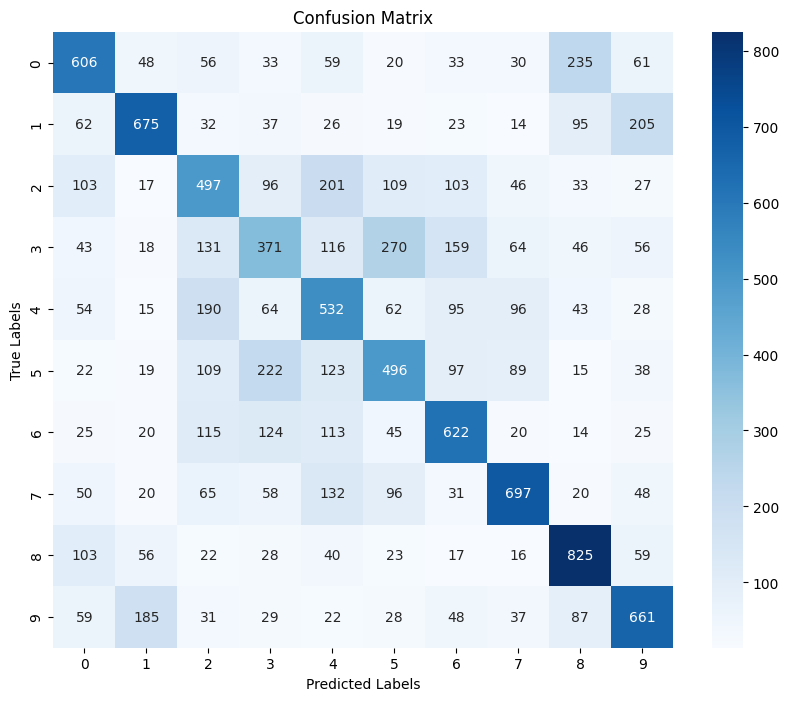

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.51      0.53      1181
           1       0.63      0.57      0.60      1188
           2       0.40      0.40      0.40      1232
           3       0.35      0.29      0.32      1274
           4       0.39      0.45      0.42      1179
           5       0.42      0.40      0.41      1230
           6       0.51      0.55      0.53      1123
           7       0.63      0.57      0.60      1217
           8       0.58      0.69      0.63      1189
           9       0.55      0.56      0.55      1187

    accuracy                           0.50     12000
   macro avg       0.50      0.50      0.50     12000
weighted avg       0.50      0.50      0.50     12000



In [3]:
# @title Default title text
# MLP MODEL v1
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report


# Cifar10 Dataset'i Tf' ile birlikte gelen dataset modulü üzerinedn otomatik olarak indirildi
(x_train_full, y_train_full), (x_test_full, y_test_full) = cifar10.load_data()

# Sklearn ile yapılabilmesi için tekrardan data setlerini birleştirildi
X = np.concatenate((x_train_full, x_test_full), axis=0)
y = np.concatenate((y_train_full, y_test_full), axis=0)

# Dataset'i eğitim ve test olacak şekilde bölündü ( %80 eğitim, %20 test)
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# eğitim veri setinden 10 resim örnek göster
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
axes = axes.ravel()  # Kolay yinelemek için

for i in range(10):
    axes[i].imshow(X_train[i])  # Resmi göster
    axes[i].set_title(f"Label: {Y_train[i][0]}")

plt.tight_layout()
plt.show()


# test veri setinden  10 resim örnek göster
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
axes = axes.ravel()  # Kolay yinelemek için

for i in range (10):
  axes[i].imshow(x_test[i])  # Resmi göster
  axes[i].set_title(f"Label: {y_test[i][0]}")

plt.tight_layout()
plt.show()


# Data yeniden şekillendirilerek 2 boyutlu bir hale getirildi çünkü MLP Classifiee 2Boyutlu inputa sahip
X_train = X_train.reshape(X_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)


# StandartScale datalar standart hale yaklaştırılıyor
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(x_test)



# MLP modelinin oluşturulması
model = MLPClassifier(hidden_layer_sizes=(256, 256),
                    activation='relu',  #aktivasyon fonksiyonu
                    solver='adam',  # ağırlıklar ve bias değerlerinin güncelleştirilmesi için ayarlanan optimizasyon
                    alpha=0.0001,
                    batch_size=32,  # tek seferde ağ'a alınacak veri input sayısı
                    learning_rate='constant',
                    learning_rate_init=0.001,
                    max_iter=40,  # keras da olan epoch sayısına tekabül etmektedir
                    random_state=42)
model.fit(X_train, Y_train.ravel())

# Modelin değerlerndirilerek score'un çıktısının alınması
accuracy = model.score(x_test, y_test.ravel())
print('Test accuracy:', accuracy)

# tahminleme yapılması ve confusion matrix için sonucların çıkartılması
y_pred = model.predict(x_test)

# confusion matrix oluşturulması
cm = confusion_matrix(y_test, y_pred)

# COnfusion matrix'in seaborn ve plot ile yazılması
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Sınıflandırma Raporu
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)






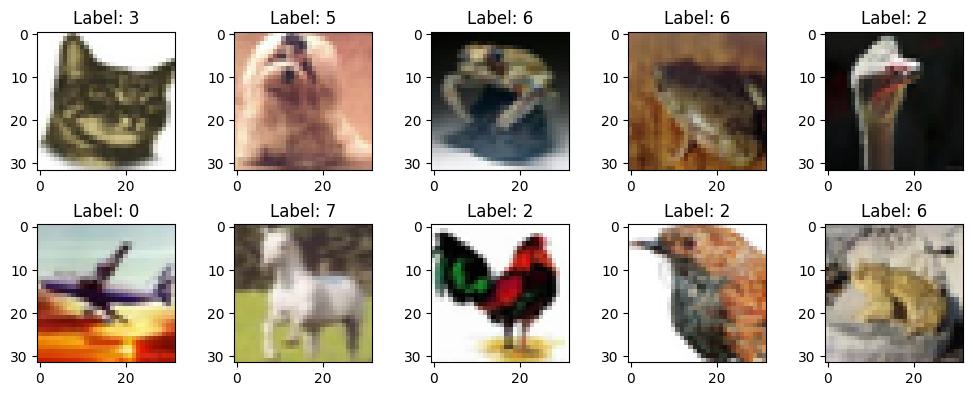

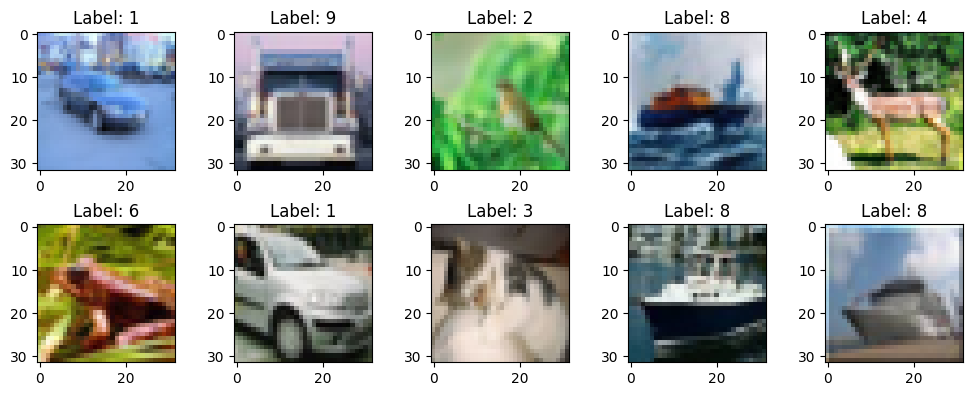

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Test accuracy: 0.5115833333333333


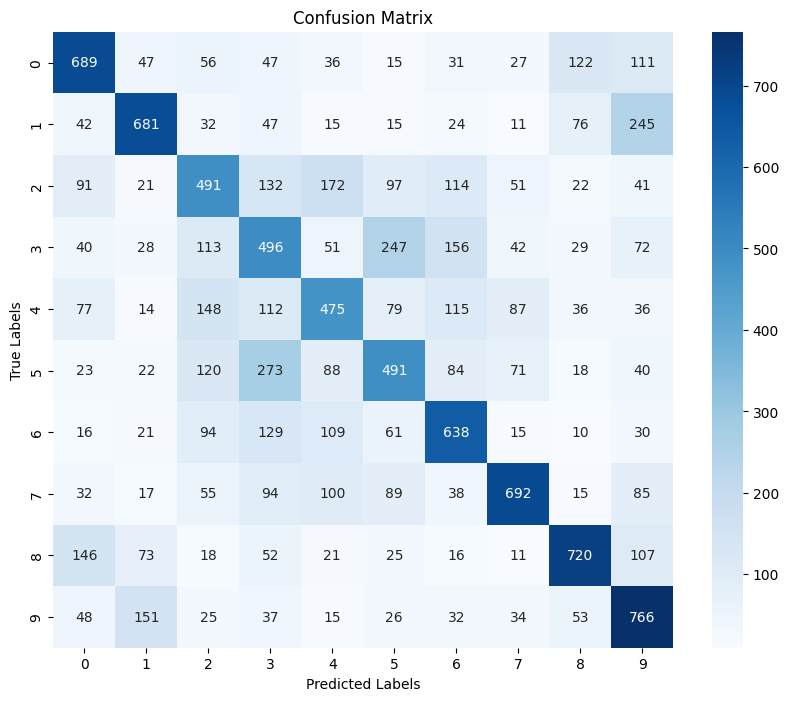

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.58      0.58      1181
           1       0.63      0.57      0.60      1188
           2       0.43      0.40      0.41      1232
           3       0.35      0.39      0.37      1274
           4       0.44      0.40      0.42      1179
           5       0.43      0.40      0.41      1230
           6       0.51      0.57      0.54      1123
           7       0.66      0.57      0.61      1217
           8       0.65      0.61      0.63      1189
           9       0.50      0.65      0.56      1187

    accuracy                           0.51     12000
   macro avg       0.52      0.51      0.51     12000
weighted avg       0.52      0.51      0.51     12000



In [4]:
# @title Default title text
# MLP MODEL v2
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report


# Cifar10 Dataset'i Tf' ile birlikte gelen dataset modulü üzerinedn otomatik olarak indirildi
(x_train_full, y_train_full), (x_test_full, y_test_full) = cifar10.load_data()

# Sklearn ile yapılabilmesi için tekrardan data setlerini birleştirildi
X = np.concatenate((x_train_full, x_test_full), axis=0)
y = np.concatenate((y_train_full, y_test_full), axis=0)

# Dataset'i eğitim ve test olacak şekilde bölündü ( %80 eğitim, %20 test)
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# eğitim veri setinden 10 resim örnek göster
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
axes = axes.ravel()  # Kolay yinelemek için

for i in range(10):
    axes[i].imshow(X_train[i])  # Resmi göster
    axes[i].set_title(f"Label: {Y_train[i][0]}")

plt.tight_layout()
plt.show()


# test veri setinden  10 resim örnek göster
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
axes = axes.ravel()  # Kolay yinelemek için

for i in range (10):
  axes[i].imshow(x_test[i])  # Resmi göster
  axes[i].set_title(f"Label: {y_test[i][0]}")

plt.tight_layout()
plt.show()


# Data yeniden şekillendirilerek 2 boyutlu bir hale getirildi çünkü MLP Classifiee 2Boyutlu inputa sahip
X_train = X_train.reshape(X_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)


# StandartScale datalar standart hale yaklaştırılıyor
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(x_test)



# MLP modelinin oluşturulması
model = MLPClassifier(hidden_layer_sizes=(512, 256),
                    activation='relu',  #aktivasyon fonksiyonu
                    solver='adam',  # ağırlıklar ve bias değerlerinin güncelleştirilmesi için ayarlanan optimizasyon
                    alpha=0.0001,
                    batch_size=128,  # tek seferde ağ'a alınacak veri input sayısı
                    learning_rate='constant',
                    learning_rate_init=0.001,
                    max_iter=50,  # keras da olan epoch sayısına tekabül etmektedir
                    random_state=42)
model.fit(X_train, Y_train.ravel())

# Modelin değerlerndirilerek score'un çıktısının alınması
accuracy = model.score(x_test, y_test.ravel())
print('Test accuracy:', accuracy)

# tahminleme yapılması ve confusion matrix için sonucların çıkartılması
y_pred = model.predict(x_test)

# confusion matrix oluşturulması
cm = confusion_matrix(y_test, y_pred)

# COnfusion matrix'in seaborn ve plot ile yazılması
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Sınıflandırma Raporu
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)






170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


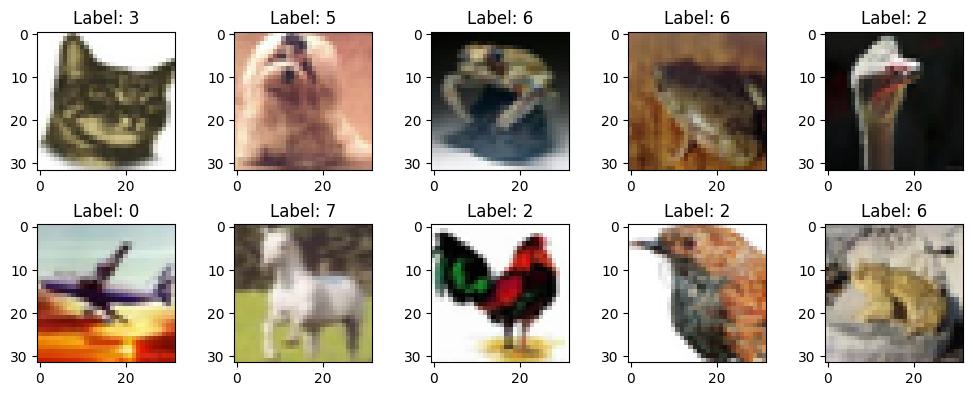

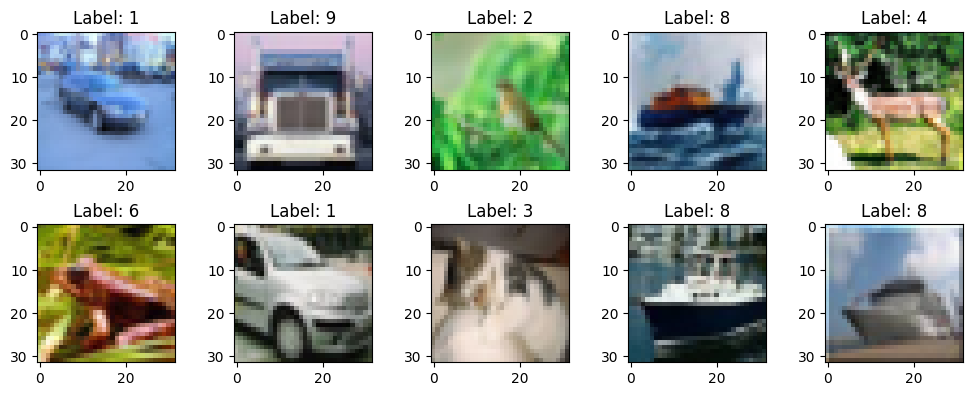

Fitting 3 folds for each of 64 candidates, totalling 192 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters found:  {'activation': 'relu', 'alpha': 0.001, 'batch_size': 128, 'hidden_layer_sizes': (1024, 512), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'solver': 'adam'}
Test accuracy: 0.5174166666666666


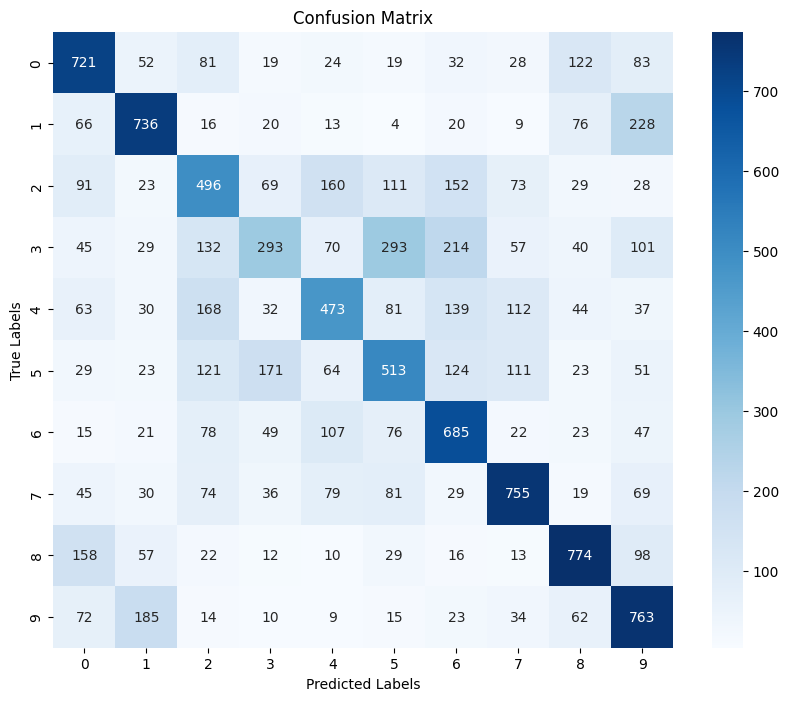

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.61      0.58      1181
           1       0.62      0.62      0.62      1188
           2       0.41      0.40      0.41      1232
           3       0.41      0.23      0.30      1274
           4       0.47      0.40      0.43      1179
           5       0.42      0.42      0.42      1230
           6       0.48      0.61      0.54      1123
           7       0.62      0.62      0.62      1217
           8       0.64      0.65      0.64      1189
           9       0.51      0.64      0.57      1187

    accuracy                           0.52     12000
   macro avg       0.51      0.52      0.51     12000
weighted avg       0.51      0.52      0.51     12000



In [1]:
# @title Default title text
# MLP MODEL GridSearchCV
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report


# Cifar10 Dataset'i Tf' ile birlikte gelen dataset modulü üzerinedn otomatik olarak indirildi
(x_train_full, y_train_full), (x_test_full, y_test_full) = cifar10.load_data()

# Sklearn ile yapılabilmesi için tekrardan data setlerini birleştirildi
X = np.concatenate((x_train_full, x_test_full), axis=0)
y = np.concatenate((y_train_full, y_test_full), axis=0)

# Dataset'i eğitim ve test olacak şekilde bölündü ( %80 eğitim, %20 test)
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# eğitim veri setinden 10 resim örnek göster
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
axes = axes.ravel()  # Kolay yinelemek için

for i in range(10):
    axes[i].imshow(X_train[i])  # Resmi göster
    axes[i].set_title(f"Label: {Y_train[i][0]}")

plt.tight_layout()
plt.show()


# test veri setinden  10 resim örnek göster
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
axes = axes.ravel()  # Kolay yinelemek için

for i in range (10):
  axes[i].imshow(x_test[i])  # Resmi göster
  axes[i].set_title(f"Label: {y_test[i][0]}")

plt.tight_layout()
plt.show()


# Data yeniden şekillendirilerek 2 boyutlu bir hale getirildi çünkü MLP Classifiee 2Boyutlu inputa sahip
X_train = X_train.reshape(X_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)


# StandartScale datalar standart hale yaklaştırılıyor
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(x_test)


#  GridSearchCV hiperparametre optimizasyonu için parametreler
param_grid = {
    'hidden_layer_sizes': [(512, 256), (1024, 512)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001],
    'batch_size': [64, 128],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.01]
}
# MLP modelinin oluşturulması
model = MLPClassifier(max_iter=10, random_state=42)

#GridSearchCV nesnesinin oluşturulması
grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, verbose=2)

#Datanın verilmesi
grid_search.fit(X_train, Y_train.ravel())

# En iyi parametreler
print("Best parameters found: ", grid_search.best_params_)


# En iyi model
best_model = grid_search.best_estimator_

# Modelin değerlerndirilerek score'un çıktısının alınması
accuracy = best_model.score(x_test, y_test.ravel())
print('Test accuracy:', accuracy)

# tahminleme yapılması ve confusion matrix için sonucların çıkartılması
y_pred = best_model.predict(x_test)




# confusion matrix oluşturulması
cm = confusion_matrix(y_test, y_pred)

# COnfusion matrix'in seaborn ve plot ile yazılması
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Sınıflandırma Raporu
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)




